In [60]:
import wbgapi as wb
import pandas as pd
from wb_data_pipeline import WbDataPipeline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

import pycountry_convert
import pycountry


import numpy as np


wb.db = 2
dp = WbDataPipeline(["NY.GDP.PCAP.PP.KD"], 2022, impute=False)
data = dp.get_data()
data = data.rename(columns={"NY.GDP.PCAP.PP.KD": "GDP"})
data.loc[data["ISO_A3"] == "TKM", "GDP"] = 8792.55
data.loc[data["ISO_A3"] == "VEN", "GDP"] = 3421
data.loc[data["ISO_A3"] == "YEM", "GDP"] = 698.95
missing_gdp = data[data["GDP"].isna()]
data["GDP"] = np.log(data["GDP"])
print(missing_gdp['ISO_A3'])

Series([], Name: ISO_A3, dtype: object)


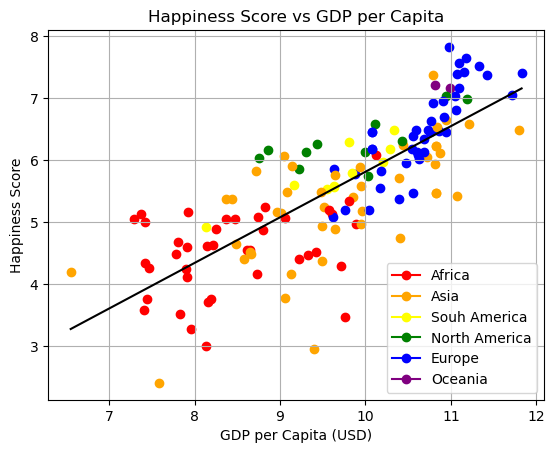

In [61]:

xs = np.linspace(data['GDP'].min(), data['GDP'].max(), 1000)

model1 = np.polyfit(data['GDP'], data['Happiness score'], 1)
# model2 = np.polyfit(data['GDP'], data['Happiness score'], 3)

colors = {'EU': 'blue', 'AS': 'orange', 'AF': 'red', 'NA': 'green', 'SA': 'yellow', 'OC': 'purple'}

for country in data['ISO_A3']:
    color = colors[pycountry_convert.country_alpha2_to_continent_code(pycountry.countries.get(alpha_3=country).alpha_2)]
    plt.scatter(data.loc[data['ISO_A3'] == country, 'GDP'], data.loc[data['ISO_A3'] == country, 'Happiness score'], marker='o', color=color)

plt.plot(xs, np.polyval(model1, xs), color='black')
# plt.plot(xs, np.polyval(model2, xs), color='black')

plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs GDP per Capita')

custom_points = [Line2D([0], [0], color='red', marker='o', label='Africa'),
                 Line2D([0], [0], color='orange', marker='o', label='Asia'),
                 Line2D([0], [0], color='yellow', marker='o', label='Souh America'),
                    Line2D([0], [0], color='green', marker='o', label='North America'),
                    Line2D([0], [0], color='blue', marker='o', label='Europe'),
                    Line2D([0], [0], color='purple', marker='o', label='Oceania')]
                 
plt.legend(handles=custom_points, loc="lower right")
plt.grid()
plt.show()